In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pca import (pca, logistic_pca)

In [2]:
def scatter_plot(Z, ix_color):
    """Scatter plots projected points, with individual colouring.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(len(ix_color)):    
        ax.scatter(Z[i, 0], Z[i, 1], c=colors[ix_color[i], ...][None])
    plt.show()

In [3]:
# settings
n_components = 2   # PCA dimensionality
n_clusters = 3     # number of clusters to simulate
n_samples = 200    # samples per cluster
n_dimensions = 16  # original dimensionality

In [4]:
# set random seed
np.random.seed(0)

# for colouring points
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, n_clusters))

# simulate data (as in Tipping's paper)
bit = np.random.rand(n_dimensions, n_clusters) > 0.5
for c in range(n_clusters):
    bits = np.repeat(bit[:, c][None, :], n_samples, axis=0)
    flip = np.random.rand(n_samples, n_dimensions) > 0.85  # this is the 'noise level'. lower this threshold for more noise
    bits[flip] = ~bits[flip]
    if c == 0:
        X = bits.copy()
        ix_color = c*np.ones(n_samples, dtype=np.int8)
    else:
        X = np.concatenate((X, bits), axis=0)
        ix_color = np.concatenate((ix_color, 
            c*np.ones(n_samples, dtype=np.int8)), axis=0)
        
X = X.astype('float64')  # from bool to float

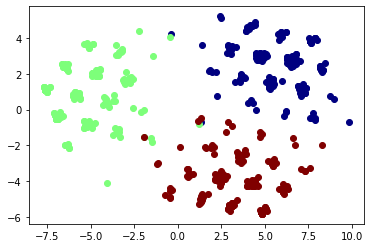

In [5]:
# cluster with logistic PCA
W = logistic_pca(X, num_components=2)[0]

# project
Z = X.dot(W)    

# visualise
scatter_plot(Z, ix_color)

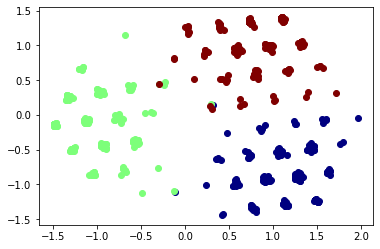

In [6]:
# cluster with PCA
W = pca(X, num_components=2, zero_mean=False)[0]    

# project
Z = X.dot(W)    

# visualise
scatter_plot(Z, ix_color)